## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df=pd.merge(mouse_metadata, study_results, how='left', on='Mouse ID')

# Display the data table for preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
study_results.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Checking the number of mice.
len(merged_df['Mouse ID'].unique())


249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_id=merged_df.loc[merged_df.duplicated(subset=['Mouse ID','Timepoint']),'Mouse ID'].unique()
duplicate_id


array(['g989'], dtype=object)

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_id_df = merged_df.loc[merged_df['Mouse ID']=='g989']
duplicate_id_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = merged_df.loc[merged_df['Mouse ID']!='g989']
cleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Checking the number of mice in the clean DataFrame.
len(cleaned_df['Mouse ID'].unique())

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
mean_mouse = cleaned_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
median_mouse = cleaned_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
var_mouse = cleaned_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
std_mouse = cleaned_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
sem_mouse = cleaned_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']
summary_df = pd.DataFrame({'Mean Tumor Volume':mean_mouse,
                           'Median Tumor Volume':median_mouse,
                           'Variance Tumor Volume':var_mouse
                          ,'Standard Deviation of Tumor Volume':std_mouse,
                          'SEM of Tumor Volume':sem_mouse})
summary_df

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviation of Tumor Volume,SEM of Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
#df.groupby('A').agg({'B': ['min', 'max'], 'C': 'sum'})
summary_df2 = cleaned_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean', 'median','var','std','sem']})
summary_df2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

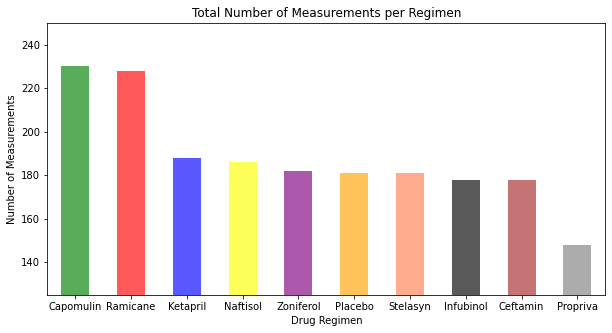

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
# .valuecounts on drug regimen =mouse_count
color_list = ["green", "red", "blue", "yellow", "purple", "orange", "coral", "black","brown", "gray"]
regimen_summary = cleaned_df['Drug Regimen'].value_counts()
regimen_summary.plot(kind='bar',figsize=(10,5),rot=0,color=color_list,alpha=.65)
# Set a Title for the chart
plt.title('Total Number of Measurements per Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Measurements')
plt.ylim(125,250)
plt.show()

(100.0, 250.0)

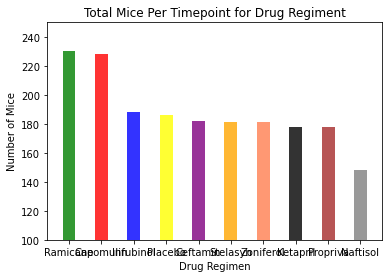

In [12]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
#regimen_summary = cleaned_df['Drug Regimen'].value_counts()
#regimen_summary
drug_id_time_df = cleaned_df[["Drug Regimen","Timepoint","Mouse ID"]]
x = drug_id_time_df['Drug Regimen'].unique().tolist()
y = drug_id_time_df['Drug Regimen'].value_counts().tolist()

plt.figure()
plt.bar(x,y,color=color_list, alpha=.8,width=.4)
plt.title('Total Mice Per Timepoint for Drug Regiment')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice')
plt.ylim(100, 250)

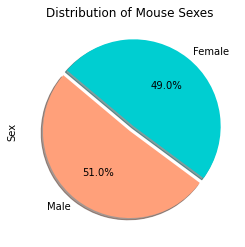

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
M_vs_F = cleaned_df["Sex"].value_counts()
#print(M_vs_F)
gender = ["Male", "Female",]

explode = (0, .1)

M_vs_F.plot(kind="pie",autopct="%1.1f%%",startangle=140,colors = ['lightsalmon','darkturquoise'],explode = (0, .07),shadow=True)
plt.title('Distribution of Mouse Sexes')
plt.show()

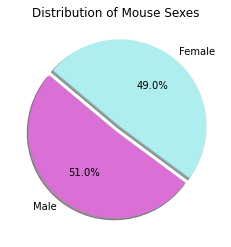

In [30]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
M_vs_F = cleaned_df["Sex"].value_counts()
#print(M_vs_F)

# Labels for the sections of our pie chart
gender = ["Male", "Female",]

# The colors of each section of the pie chart
color = color_list

# Tells matplotlib to seperate the "Female" section from the others
explode = (0, .07)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(M_vs_F, colors=['orchid','paleturquoise'],autopct="%1.1f%%", shadow=True, startangle=140, labels=gender, explode=explode,)
plt.title('Distribution of Mouse Sexes')
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
spec_drug_df = cleaned_df.loc[(cleaned_df["Drug Regimen"] == "Capomulin") |(cleaned_df["Drug Regimen"] == "Ramicane") |
                              (cleaned_df["Drug Regimen"] == "Infubinol") | (cleaned_df["Drug Regimen"] == "Ceftamin")]

# Start by getting the last (greatest) timepoint for each mouse
gg = spec_drug_df.groupby("Mouse ID")
for each_mouse in gg:
    max_timepoint = gg["Timepoint"].max()
max_df = pd.DataFrame({
    "Maximum Timepoint" : max_timepoint
})
new_df = pd.merge(spec_drug_df,max_df, on = "Mouse ID")
new_df = new_df.loc[new_df["Timepoint"] == new_df["Maximum Timepoint"]]
final_tumor_volume = new_df[["Mouse ID", "Tumor Volume (mm3)"]]

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_volume_merge = pd.merge(cleaned_df, final_tumor_volume, how = "outer", on = "Mouse ID")
rn_fnl_vol_df = final_volume_merge.rename(columns = ({
    "Tumor Volume (mm3)_y" : "Final Tumor Volume (mm3)",
    "Tumor Volume (mm3)_x" : "Tumor Volume (mm3)"
}))
rn_fnl_vol_df.head(30)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1


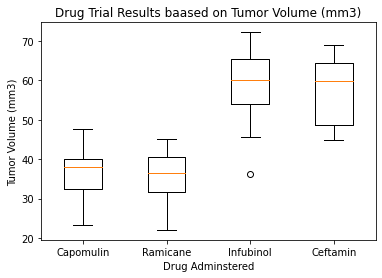

In [23]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_data = drug_success[['Mouse ID','Timepoint']].merge(cleaned_df,on=['Mouse ID','Timepoint'],how="left")
merged_data.head()

tumor_vol_list = []
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
for drug in treatment_list:
    final_tumor_vol = merged_data.loc[merged_data["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    tumor_vol_list.append(final_tumor_vol)

fig1, axl = plt.subplots()
# ax1.set_ylabel('Final Tumor Volume (mm3)')
# axl.boxplot(tumor_vol_list)
# plt.show()
axl.boxplot(tumor_vol_list, labels = treatment_list)
# plt.ylabel('Final Tumor Volume (mm3)')
plt.title("Drug Trial Results baased on Tumor Volume (mm3)")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Drug Adminstered")
plt.grid=(True)

## Line and Scatter Plots

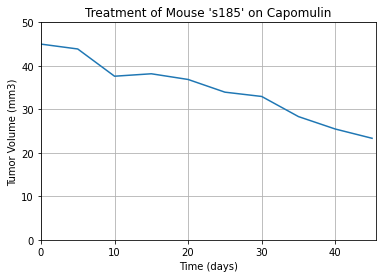

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_data = cleaned_df[cleaned_df["Drug Regimen"] == "Capomulin"]
capomulin_mouse_data = capomulin_data[capomulin_data["Mouse ID"] == "s185"]
x_line = capomulin_mouse_data["Timepoint"]
y_line = capomulin_mouse_data["Tumor Volume (mm3)"]
plt.plot(x_line, y_line)
plt.title("Treatment of Mouse 's185' on Capomulin")
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid(True)
plt.xlim(0,45.5)
plt.ylim(0,50)
plt.show()

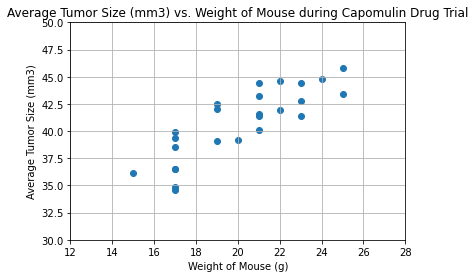

In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
grouped_mouse = capomulin_data.groupby(["Mouse ID"])
grouped_weight = grouped_mouse["Weight (g)"].mean()
avg_tumor_size_bymouse = grouped_mouse["Tumor Volume (mm3)"].mean()
plt.scatter(x = grouped_weight, y = avg_tumor_size_bymouse)
plt.title("Average Tumor Size (mm3) vs. Weight of Mouse during Capomulin Drug Trial")
plt.xlabel("Weight of Mouse (g)")
plt.ylabel("Average Tumor Size (mm3)")
plt.grid(True)
plt.xlim(12,28)
plt.ylim(30,50)
plt.show()

## Correlation and Regression

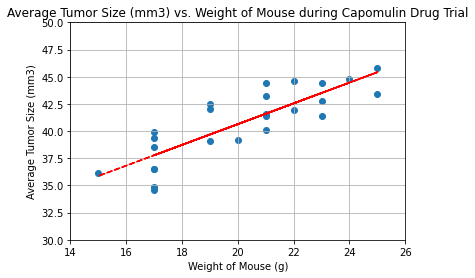

The correlation coeffienct is 0.84 for the Mouse Weight against the Tumor volume.


In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr_coeff = round(sts.pearsonr(grouped_weight,avg_tumor_size_bymouse)[0],2)
plt.scatter(x = grouped_weight, y = avg_tumor_size_bymouse)
plt.title("Average Tumor Size (mm3) vs. Weight of Mouse during Capomulin Drug Trial")
plt.xlabel("Weight of Mouse (g)")
plt.ylabel("Average Tumor Size (mm3)")
plt.grid(True)
plt.xlim(14,26)
plt.ylim(30,50)
linregress = sts.linregress(x = grouped_weight, y = avg_tumor_size_bymouse)
slope = linregress[0]
intercept = linregress[1]
bestfit = slope*grouped_weight + intercept
plt.plot(grouped_weight,bestfit, "--",color = "red")
plt.show()
print(f'The correlation coeffienct is {corr_coeff} for the Mouse Weight against the Tumor volume.')